<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Seyed Hamid Ghasemi

**Student ID**: 400109768





# Logistic Regression


In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
from google.colab import files
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings




In [143]:
warnings.filterwarnings('ignore', category=UserWarning)

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!


In [135]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, alpha=0.05, n_iterations=1000, device='cuda'):
        self.l_rate = alpha
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        self.n_iterations = n_iterations
        self.theta = None

    def sigmoid(self, Z):
        Z = torch.tensor(Z, dtype=torch.float32, device=self.device)
        return 1 / (1 + torch.exp(-Z))

    def loss(self, theta, X, y):
        m, n = X.shape
        h = self.sigmoid(X @ theta)
        loss = -1/m*(torch.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))
        return loss

    def computeGradient(self, X, y):
        m, n = X.shape
        h = self.sigmoid(X @ self.theta)
        grad = nn.Parameter(torch.zeros(self.theta.shape[0], device=self.device, requires_grad=True))
        with torch.no_grad():
          for i in range(n):
              temp =  X[:,i]
              grad[i] = 1/m *  torch.tensordot((h-y), temp, dims=1)
        return grad

    def fit(self, X, y):
        X = np.insert(X, 0, np.ones((X.shape[0])), axis=1)
        m, n = X.shape
        X_tensor = torch.tensor(X, dtype=torch.float32, device=self.device)
        y_tensor = torch.tensor(np.array(y), dtype=torch.long, device=self.device)
        self.theta = nn.Parameter(torch.zeros(n, device=self.device, requires_grad=True))
        for i in range(self.n_iterations):
            grad = self.computeGradient(X_tensor, y_tensor)
            # Update the parameters
            theta_new = self.theta - self.l_rate * grad
            self.theta = theta_new
        pass


    def predict(self, X):
        X = np.insert(X, 0, np.ones((X.shape[0])), axis=1)
        X_tensor = torch.tensor(X, dtype=torch.float32, device=self.device)
        h = self.sigmoid(X_tensor @ self.theta)
        Y = (h >= 0.5).long()
        return Y

    pass

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [136]:
# Your code goes here!
data = pd.read_csv("Logistic_question.csv")
# Convert the target column to binary
data['Target'] = (data['Target'] > 0.5).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Train a logistic regression model
model_lr = MyLogisticRegression()
model_lr.fit(X_train_norm, y_train)

# Evaluate the model on the test set
y_pred = model_lr.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ","{:.3f}".format(accuracy))
print("Precision: ","{:.3f}".format(precision))
print("Recall: ","{:.3f}".format(recall))
print("F1-score: ","{:.3f}".format(f1))

<ipython-input-135-916ea3bdd68f>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Z = torch.tensor(Z, dtype=torch.float32, device=self.device)


Accuracy:  0.925
Precision:  0.921
Recall:  1.000
F1-score:  0.959


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.


**Your answer:**
the key evaluation metrics for a logistic regression model are:

1. **Accuracy:**
* Accuracy is the most commonly used metric, representing the overall correctness of the model's predictions.
* Accuracy is calculated as (TP + TN) / (TP + TN + FP + FN), where TP, TN, FP, and FN are the true positives, true negatives, false positives, and false negatives, respectively.
* Accuracy is a good metric when the classes are balanced and the cost of false positives and false negatives is similar.

2. **Precision:**
* Precision measures the model's ability to correctly predict the positive class.
* Precision is calculated as TP / (TP + FP).
* Precision is useful when the cost of false positives is high, such as in tasks where the positive class is more important (e.g., detecting fraud, diagnosing a serious disease).

3. **Recall (Sensitivity/True Positive Rate):**
* Recall quantifies the model's ability to correctly identify the positive class instances.
* Recall is calculated as TP / (TP + FN).
* Recall is important when the cost of false negatives is high, such as in tasks where missing a positive instance is more critical (e.g., detecting cancer, identifying high-risk individuals).

4. **F1-score:**
* The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
* F1-score is calculated as 2 * (Precision * Recall) / (Precision + Recall).
* The F1-score is useful when you want to balance the trade-off between precision and recall, especially when the classes are imbalanced.

The choice of evaluation metric(s) depends on the specific task and the relative importance of different types of errors. For example:
* In a medical diagnosis task, where missing a positive case (false negative) is more costly, recall would be a more important metric.
* In a fraud detection task, where false positives (incorrectly flagging a transaction as fraudulent) can be costly, precision would be a more important metric.
* In a balanced classification task, where the cost of errors is similar, accuracy and F1-score may be the most appropriate metrics.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.


In [ ]:

# Your code goes here!
data = pd.read_csv('Logistic_question.csv')

# Convert the target column to binary
data['Target'] = (data['Target'] > 0.5).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Train a logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_norm, y_train)

# Evaluate the model on the test set
y_pred = model_lr.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ","{:.3f}".format(accuracy))
print("Precision: ","{:.3f}".format(precision))
print("Recall: ","{:.3f}".format(recall))
print("F1-score: ","{:.3f}".format(f1))


Accuracy:  0.950
Precision:  0.946
Recall:  1.000
F1-score:  0.972


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?


**Your answer:**
comparison of a custom logistic regression function and the built-in logistic regression function in terms of performance and parameters:

1. **Performance:**
* Built-in Function: The built-in logistic regression function, such as sklearn.linear_model.LogisticRegression, is likely to have better performance than a custom implementation. This is because the built-in function is optimized and leverages efficient algorithms and libraries, potentially utilizing hardware-specific optimizations.
* Custom Function: A custom implementation of logistic regression may not be as performant as the built-in function, as it would not have the same level of optimization and hardware acceleration.

2. **Parameters:**
* **Built-in Function:**
The built-in logistic regression function in scikit-learn (sklearn.linear_model.LogisticRegression) has several parameters that can affect the model's performance:
 * penalty: The type of regularization to apply (e.g., 'l1', 'l2', 'elasticnet').
 * C: The inverse of the regularization strength. Smaller values specify stronger regularization.
 * solver: The algorithm to use in the optimization problem (e.g., 'lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga').
 * max_iter: The maximum number of iterations taken for the solvers to converge.
 * random_state: The seed used by the random number generator.
These parameters can significantly impact the model's performance, such as its ability to generalize, convergence speed, and handling of overfitting.
* **Custom Function:**
In a custom implementation, you would need to manually implement the parameters and their effects on the model's performance. This may require more effort and a deeper understanding of the underlying algorithms and optimization techniques.

3. Flexibility:
* **Built-in Function:**
The built-in logistic regression function provides a wide range of options and configurations, allowing you to fine-tune the model's behavior to suit your specific needs.
* **Custom Function:**
A custom implementation may have limited flexibility, as you would need to implement the various features and options yourself, which can be time-consuming and error-prone.

# Multinomial Logistic Regression


**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!


In [ ]:
# import necessary libraries
class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self,num_classes ,num_features ,learning_rate=0.01, n_iter=1000, device='cuda'):
        self.l_rate = learning_rate
        self.n_iter = n_iter
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        self.nc = num_classes
        self.nf = num_features
        self.W = nn.Parameter(torch.zeros(num_classes, num_features, device=self.device, requires_grad=True))
        self.b = nn.Parameter(torch.zeros(num_classes, device=self.device, requires_grad=True))

    def softmax(self,x):
        #Compute softmax values for each sets of scores in x.
        x = torch.tensor(x, dtype=torch.float32, device=self.device)
        e_x = torch.exp(x)
        return e_x / torch.sum(e_x, axis=1, keepdims=True)



    def loss_function(self, X, y):
        logits = torch.matmul(X, self.W.t()) + self.b
        soft_logits = self.softmax(logits)
        log_soft_logits = torch.log(soft_logits)
        loss = -torch.mean(torch.mul(log_soft_logits, y))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_tensor = torch.tensor(X, dtype=torch.float32, device=self.device)
        y_tensor = torch.tensor(y, dtype=torch.long, device=self.device)

        for i in range(self.n_iter):
          logits = torch.matmul(X_tensor, self.W.t()) + self.b
          soft_logits = self.softmax(logits)
          grad_W = (1 / n_samples) * torch.matmul(X_tensor.t(), (soft_logits - y_tensor)).t()
          grad_b = (1 / n_samples) * torch.sum(soft_logits - y_tensor, dim=0)
          self.W = self.W - self.l_rate * grad_W
          self.b = self.b - self.l_rate * grad_b


    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32, device=self.device)
        logits = torch.matmul(X_tensor, self.W.t()) + self.b
        predictions = torch.argmax(logits, dim=1)
        return predictions.cpu().numpy()

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
# Your code goes here!

# Your code goes here!
data = pd.read_csv('Logistic_question.csv')

X = data.drop('Target', axis=1)
y = data['Target']
n_samples, n_features = X.shape
num_classes = range(2,11)
accuracys = []
precisions = []
recalls = []
f1s = []

# Iterate over different levels of quantization
for i in range(2, 11):
    # Quantize the target column into i levels
    y_quantized = pd.qcut(data['Target'], i, labels=False)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_quantized, test_size=0.2, random_state=42)

    y_train_onehot = np.eye(i)[y_train]

    # Normalize the data
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # Train the model (in this example, we use Logistic Regression)
    model = MyMultinomialLogisticRegression(i ,n_features)
    model.fit(X_train.to_numpy(), y_train_onehot)

    # Test the model on the testing set
    y_pred = model.predict(X_test.to_numpy())


    accuracys.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))



In [ ]:
for i in range(0, 9):
  print("number of classes :",i+2)
  print("accuracys :",accuracys[i])
  print("precisions :",precisions[i])
  print("recalls :",recalls[i])
  print("f1s :",f1s[i])
  print()


number of classes : 2
accuracys : 0.925
precisions : 0.9288039974210187
recalls : 0.925
f1s : 0.9245238095238093

number of classes : 3
accuracys : 0.5875
precisions : 0.7823022718702866
recalls : 0.5875
f1s : 0.5994944553163732

number of classes : 4
accuracys : 0.5
precisions : 0.5748961794019933
recalls : 0.5
f1s : 0.4595994256288375

number of classes : 5
accuracys : 0.4625
precisions : 0.5091666666666667
recalls : 0.4625
f1s : 0.43131537176274026

number of classes : 6
accuracys : 0.45
precisions : 0.46918010150768763
recalls : 0.45
f1s : 0.43149138910743956

number of classes : 7
accuracys : 0.45
precisions : 0.47674433409727524
recalls : 0.45
f1s : 0.458209935210966

number of classes : 8
accuracys : 0.375
precisions : 0.40374261155511154
recalls : 0.375
f1s : 0.36755693581780535

number of classes : 9
accuracys : 0.3375
precisions : 0.318392094017094
recalls : 0.3375
f1s : 0.3175645612860725

number of classes : 10
accuracys : 0.275
precisions : 0.27831876456876453
recalls : 0.

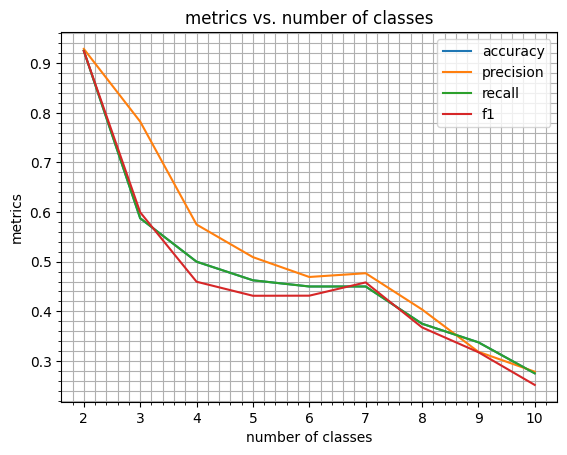

In [ ]:
# Plot metrics versus number of classes
plt.plot(num_classes, accuracys,label="accuracy")
plt.plot(num_classes, precisions,label="precision")
plt.plot(num_classes, recalls,label="recall")
plt.plot(num_classes, f1s,label="f1")

plt.xlabel('number of classes')
plt.ylabel('metrics')
plt.title('metrics vs. number of classes')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**
` i=2`

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.


In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!


In [128]:
# Your code goes here!
data = pd.read_csv('adult.csv')
data = data.replace('?', np.nan)
print(data.isnull().sum().sum())
print(data.shape)

6465
(48842, 15)


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

1.  **Dropping Null Values:**
*   This method involves removing rows or columns that contain any null values.
*   It is suitable when the percentage of null values is low (e.g., less than 5-10%) and dropping the affected rows/columns won't significantly impact the analysis.
*   This approach is straightforward but can lead to a substantial loss of data, especially if the null values are widespread.
It's best used when the remaining data is still sufficient to perform meaningful analysis.


2.   **Filling Null Values:**

*   This method replaces null values with specific values, such as the mean, median, mode, or a constant.
*   It is appropriate when the null values can be reasonably estimated from the existing data, and the impact of the substitution is not expected to skew the analysis.
*   Filling with the mean or median is suitable when the null values are randomly distributed, while filling with the mode is better for categorical variables.

3. **Imputation:**

* Imputation involves replacing missing values with estimated values based on patterns in the existing data.
* This method is useful when the missing values are not random and can be predicted from other variables in the dataset.
* Techniques like k-nearest neighbors, linear regression, or more advanced methods like multiple imputation can be used for imputation.
* Imputation is suitable when the dataset is large enough to identify reliable patterns and the missing values are not too widespread (e.g., less than 20-30%).

4. **Interpolation:**

* Interpolation estimates missing values based on neighboring data points, typically used for time series or sequential data.
* It is appropriate when the missing values follow a predictable trend or pattern that can be inferred from the surrounding data points.
* Common interpolation methods include linear, polynomial, or spline interpolation, depending on the nature of the data.
* Interpolation works best when the missing values are not too far apart and the underlying trend is relatively smooth.

5. **Machine Learning Models:**

* This advanced method uses machine learning models to predict missing values based on other features in the dataset.
* It is suitable when the dataset is complex, and the missing values are related to other variables in a predictive manner.
* Techniques like regression, classification, or more sophisticated models like neural networks can be employed for this purpose.
* This approach is beneficial when the dataset is large enough to train reliable models and the missing values are not too widespread (e.g., less than 20-30%).


**To decide which method to use, consider the following factors:**
1. Percentage of missing values: If the missing values are minimal, simpler methods like dropping or filling may be sufficient. For higher percentages, more advanced techniques like imputation or machine learning models may be necessary.

2. Randomness of missing values: If the missing values are random and not related to other variables, simpler methods like filling may be appropriate. If the missing values follow a pattern, imputation or interpolation may be more suitable.

3. Impact on analysis: Evaluate how the chosen method will affect the analysis results. Dropping or filling may be preferred if the impact is minimal, while imputation or machine learning models may be necessary if the missing values significantly influence the analysis.

4. Available data and resources: Consider the size of the dataset, the computational resources available, and the expertise required for more advanced techniques like imputation or machine learning models.

In [23]:
print("missing values percenrage:",data.isnull().sum().sum()/48842/15*100,"%")

missing values percenrage: 0.8824372466319971 %


As a result, since the percentage of Missing data is less than 5%, I use Dropping Null Values Methods.

**Task:** Handle null entries using your best method.


In [129]:
# Your code goes here!

# Drop rows with any null values
print("data.shape: ",data.shape)
data_dropped = data.dropna()
print("data_dropped.shape: ",data_dropped.shape)

data.shape:  (48842, 15)
data_dropped.shape:  (45222, 15)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [130]:
# Your code goes here!
data_cat = data_dropped.copy()
print(data_dropped)
print("________________________________________________________________________________________________________________")
# Convert categorical features to numerical values
for column in data_dropped.columns:
    if data_dropped[column].dtype == 'object':
      #print(column)
      data_cat[column] = data_dropped[column].astype('category').cat.codes
print(data_cat)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

In [137]:
# Split the dataset into features (X) and target (y)
X = data_cat.drop('income', axis=1)
y = data_cat['income']


In [133]:

# Split the dataset into training and testing sets (80-20 portion)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model and the hyperparameter grid
model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Perform GridSearchCV to find the best model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the train and test accuracy
print('Best Parameters:', grid_search.best_params_)
print('Train Accuracy:', grid_search.best_score_)
print('Test Accuracy:', grid_search.score(X_test_scaled, y_test))


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Train Accuracy: 0.8202724227285595
Test Accuracy: 0.8210060807075732


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
# Your code goes here!

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Split X_train into 10 parts
n_splits = 10
X_train_parts = np.array_split(X_train_norm, n_splits)
y_train_parts = np.array_split(y_train, n_splits)


# Train 10 separate Logistic Regression models
models = []
predictions = []
model_accuracies = []


for i in range(n_splits):
    model = MyLogisticRegression()
    model.fit(X_train_parts[i], y_train_parts[i])

    models.append(model)
    predictions.append(model.predict(X_test_norm))
    model_accuracies.append(accuracy_score(y_test, predictions[i]))


In [139]:
#1. Majority Voting Ensemble
majority_vote_pred = np.array([np.argmax(np.bincount(pred)) for pred in np.transpose(predictions)])
majority_vote_acc = accuracy_score(y_test, majority_vote_pred)

#2. Weighted Averaging Ensemble
weights = [acc / sum(model_accuracies) for acc in model_accuracies]
weighted_avg_pred = np.array([int(np.average(pred, axis=0, weights=weights) >= 0.5) for pred in np.transpose(predictions)])
weighted_avg_acc = accuracy_score(y_test, weighted_avg_pred)

#3. Simple Averaging
simple_avg_pred = np.array([int(np.average(pred, axis=0) >= 0.5) for pred in np.transpose(predictions)])
simple_avg_acc = accuracy_score(y_test, simple_avg_pred)

print("Simple Averaging Accuracy:", simple_avg_acc)
print("Weighted Averaging Accuracy:", weighted_avg_acc)
print("Majority Voting Accuracy:", majority_vote_acc)


Simple Averaging Accuracy: 0.8210060807075732
Weighted Averaging Accuracy: 0.8215588723051409
Majority Voting Accuracy: 0.8197899391929243


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
1. **Majority Voting:**
* **Reason:** Majority voting is a simple and effective ensemble method that can improve the overall performance of the model. By combining the predictions of multiple models, the majority voting approach can help reduce the impact of individual model errors and provide a more robust prediction.
* **Implementation:** For each test sample, collect the predictions from all the individual models and assign the class label that receives the majority of the votes. This can be implemented using the np.argmax(np.bincount(predictions)) approach, where predictions is a list of the individual model predictions for a given test sample.

2. **Simple Averaging:**
* **Reason:** Simple averaging is a straightforward and effective ensemble method that can improve the overall performance of the model. By taking the average of the predictions from multiple models, the simple averaging approach can help reduce the impact of individual model errors and provide a more robust prediction.
* **Implementation:** For each test sample, collect the predictions from all the individual models and take the average of these predictions to obtain the final prediction.

3. **Weighted Averaging with Accuracy Weights:**
* **Reasons**:
Model Performance Consideration: Weighted averaging allows us to consider the individual performance of each model and assign weights accordingly. Models with higher accuracy or reliability can be given more weight in the final prediction.
Optimizing Ensemble Performance: By assigning weights based on accuracy, we can optimize the ensemble's performance by giving more influence to the more accurate models.
Flexibility: Weighted averaging with accuracy weights provides flexibility in adjusting the contribution of each model based on its performance, leading to a more tailored and potentially higher-performing ensemble.
* **Implementation:**
Train multiple base models on the training data.
Assign weights to each model based on their accuracy or performance on a validation set.
For each test sample, compute a weighted average of the predictions from the models, where the weights are proportional to the models' accuracy.
The final prediction is calculated by summing the weighted predictions

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# Your code goes here!
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Initialize lists to store the results
train_accuracies = []
test_accuracies = []

for i in range(2, 101):
    print(i)
    # Split X_train into i parts
    X_train_splits = np.array_split(X_train_norm, i)
    y_train_splits = np.array_split(y_train, i)

    # Train i separate Logistic Regression models
    models = []
    predictions_test = []
    predictions_train = []
    model_accuracies_test = []
    model_accuracies_train = []

    for j in range(i):
        model = MyLogisticRegression()
        model.fit(X_train_splits[j], y_train_splits[j])

        models.append(model)
        predictions_test.append(model.predict(X_test_norm))
        predictions_train.append(model.predict(X_train_norm))
        model_accuracies_test.append(accuracy_score(y_test, predictions_test[j]))
        model_accuracies_train.append(accuracy_score(y_train, predictions_train[j]))


    # Weighted Averaging Ensemble
    weights_test = [acc / sum(model_accuracies_test) for acc in model_accuracies_test]
    weighted_avg_pred_test = np.array([int(np.average(pred, axis=0, weights=weights_test) >= 0.5) for pred in np.transpose(predictions_test)])
    test_accuracies.append(accuracy_score(y_test, weighted_avg_pred_test))

    weights_train = [acc / sum(model_accuracies_train) for acc in model_accuracies_train]
    weighted_avg_pred_train = np.array([int(np.average(pred, axis=0, weights=weights_train) >= 0.5) for pred in np.transpose(predictions_train)])
    train_accuracies.append(accuracy_score(y_train, weighted_avg_pred_train))


In [145]:
for i in range(len(train_accuracies)):
  print("number =",i+2," , ","train_accuracie=",train_accuracies[i]," , ","test_accuracie=",test_accuracies[i],)

number = 2  ,  train_accuracie= 0.8172872266909915  ,  test_accuracie= 0.821779988944168
number = 3  ,  train_accuracie= 0.8175636454100672  ,  test_accuracie= 0.8220011055831952
number = 4  ,  train_accuracie= 0.8174254360505293  ,  test_accuracie= 0.8215588723051409
number = 5  ,  train_accuracie= 0.8170384498438235  ,  test_accuracie= 0.8197899391929243
number = 6  ,  train_accuracie= 0.817066091715731  ,  test_accuracie= 0.8207849640685462
number = 7  ,  train_accuracie= 0.8169278823561932  ,  test_accuracie= 0.8212271973466003
number = 8  ,  train_accuracie= 0.8178953478729579  ,  test_accuracie= 0.8220011055831952
number = 9  ,  train_accuracie= 0.8169278823561932  ,  test_accuracie= 0.8210060807075732
number = 10  ,  train_accuracie= 0.8175083616662521  ,  test_accuracie= 0.8215588723051409
number = 11  ,  train_accuracie= 0.8173425104348067  ,  test_accuracie= 0.821779988944168
number = 12  ,  train_accuracie= 0.8174530779224369  ,  test_accuracie= 0.8215588723051409
number = 1

In [153]:
# Find the best model
index_of_best = np.argmax(test_accuracies)
k = np.arange(2, 101)[index_of_best]
best_train_accuracy = train_accuracies[index_of_best]
best_test_accuracy = test_accuracies[index_of_best]
print(" best number of parts =",k,"\n","train_accuracie=",best_train_accuracy,"\n","test_accuracie=",best_test_accuracy)

 best number of parts = 52 
 train_accuracie= 0.8174807197943444 
 test_accuracie= 0.8228855721393035


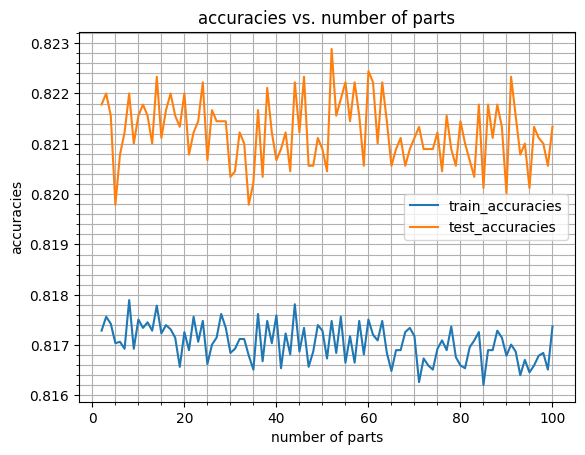

In [148]:
# Plot metrics versus number of classes
plt.plot(np.arange(2, 101), train_accuracies,label="train_accuracies")
plt.plot(np.arange(2, 101), test_accuracies,label="test_accuracies")

plt.xlabel('number of parts')
plt.ylabel('accuracies')
plt.title('accuracies vs. number of parts')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Question:** Analyze the results.

**Your Answer:**

As can be seen from the graphs, changing the number of sections did not have a big impact on the performance of the models.